In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pysindy as ps
import networkx as nx

In [4]:
rev_df = pd.read_csv("revenue.csv")
rev_df

,year,1-1-drillisch,1-800-flowers,1-800-petmeds,10x-genomics,11-bit-studios,1st-bancorp,1st-source,1stdibs-com,22nd-century-group,...,zuora,zur-rose-group,zurich-airport,zurich-insurance-group,zurn-water-solutions,zydus-lifesciences,zydus-wellness,zymeworks,zynerba-pharmaceuticals,zynex
0,2001,NaN,470.0,24.28,NaN,NaN,50.70,210.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,NaN,540.0,50.76,NaN,NaN,61.35,190.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,NaN,580.0,87.39,NaN,NaN,70.67,180.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,NaN,620.0,100.00,NaN,NaN,77.15,160.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25
4,2005,NaN,730.0,130.00,NaN,NaN,83.59,160.0,NaN,NaN,...,NaN,NaN,530.0,NaN,NaN,NaN,NaN,NaN,NaN,2.25
5,2006,NaN,850.0,150.00,NaN,NaN,90.74,180.0,NaN,NaN,...,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,2.55
6,2007,NaN,920.0,180.00,NaN,NaN,97.75,180.0,NaN,NaN,...,NaN,NaN,700.0,NaN,NaN,NaN,NaN,NaN,NaN,8.04
7,2008,NaN,920.0,210.00,NaN,NaN,100.00,210.0,NaN,NaN,...,NaN,NaN,810.0,NaN,NaN,NaN,NaN,NaN,NaN,11.76
8,2009,480.0,570.0,230.00,NaN,NaN,120.00,210.0,NaN,NaN,...,NaN,NaN,790.0,70350.0,NaN,NaN,NaN,NaN,NaN,18.68
9,2010,470.0,660.0,230.00,NaN,NaN,190.00,230.0,NaN,NaN,...,NaN,520.0,920.0,67840.0,NaN,NaN,NaN,NaN,NaN,24.08


In [161]:
df = (rev_df
      .set_index('year')
      .loc[:, ~rev_df.isna().any()]
      .abs()
      .add(.01)
      .interpolate()
      # .pipe(np.log)
      .div(10 ** np.floor(np.log10(df.max())))
)
df

,1-800-flowers,1-800-petmeds,1st-bancorp,1st-source,374water,3d-systems,3m,8x8,aaon,aar,...,xcel-energy,xerox,xoma,yellow-corporation,york-water,ypf,yum,zebra-technologies,ziff-davis,zions
year,,,,,,,,,,,,,,,,,,,,,
2001,0.47001,0.2429,0.5071,2.1001,0.02,1.2001,1.607001,0.1688,1.5001,0.76001,...,1.472001,1.700001,1.728,3.27001,1.941,0.544001,0.695001,0.45001,0.03326,1.36001
2002,0.54001,0.5077,0.6136,1.9001,0.13,1.1001,1.633001,0.1032,1.5001,0.59001,...,1.156001,1.584001,2.995,3.00001,1.956,0.545001,0.775001,0.47001,0.04822,1.41001
2003,0.58001,0.8740,0.7068,1.8001,0.10,1.1001,1.823001,0.1025,1.4001,0.61001,...,0.851001,1.570001,2.442,3.06001,2.089,0.719001,0.838001,0.53001,0.07163,1.58001
2004,0.62001,1.0001,0.7716,1.6001,0.10,1.2001,2.001001,0.0954,1.7001,0.68001,...,0.836001,1.572001,0.367,6.76001,2.251,0.682001,0.901001,0.66001,0.10001,1.59001
2005,0.73001,1.3001,0.8360,1.6001,0.10,1.3001,2.116001,0.2547,1.8001,0.82001,...,0.963001,1.570001,1.867,8.74001,2.681,0.778001,0.934001,0.70001,0.14001,1.80001
2006,0.85001,1.5001,0.9075,1.8001,0.05,1.3001,2.292001,0.4909,2.3001,0.96001,...,0.984001,1.589001,2.950,9.91001,2.866,0.803001,0.956001,0.75001,0.18001,2.31001
2007,0.92001,1.8001,0.9776,1.8001,0.03,1.5001,2.446001,0.5971,2.6001,1.19001,...,1.003001,1.640001,8.426,9.62001,3.144,0.931001,1.041001,0.86001,0.22001,2.29001
2008,0.92001,2.1001,1.0001,2.1001,0.03,1.3001,2.526001,0.6525,2.7001,1.48001,...,1.120001,1.760001,6.799,8.94001,3.284,1.098001,1.127001,0.97001,0.24001,2.20001
2009,0.57001,2.3001,1.2001,2.1001,0.04,1.1001,2.312001,0.6330,2.4001,1.38001,...,0.964001,1.517001,9.844,5.28001,3.705,0.907001,1.083001,0.80001,0.24001,2.53001


In [163]:
df_dt = (df
         .pct_change(2)
         .pipe(lambda x: (x.bfill() + x.fillna(x.mean())) / 2)
        )
df_dt

,1-800-flowers,1-800-petmeds,1st-bancorp,1st-source,374water,3d-systems,3m,8x8,aaon,aar,...,xcel-energy,xerox,xoma,yellow-corporation,york-water,ypf,yum,zebra-technologies,ziff-davis,zions
year,,,,,,,,,,,,,,,,,,,,,
2001,0.211201,1.450340,0.309086,-0.042283,3.413585,0.080489,0.108585,0.117837,0.049624,-0.034931,...,-0.200598,-0.068317,0.573895,0.036833,0.095813,0.217703,0.112750,0.267928,0.803949,0.124302
2002,0.211201,1.450340,0.309086,-0.042283,3.413585,0.080489,0.108585,0.117837,0.049624,-0.034931,...,-0.200598,-0.068317,0.573895,0.036833,0.095813,0.217703,0.112750,0.267928,0.803949,0.124302
2003,0.234038,2.598189,0.393808,-0.142850,4.000000,-0.083326,0.134412,-0.392773,-0.066662,-0.197366,...,-0.421875,-0.076471,0.413194,-0.064220,0.076249,0.321691,0.205755,0.177774,1.153638,0.161764
2004,0.148145,0.969864,0.257497,-0.157886,-0.230769,0.090901,0.225352,-0.075581,0.133324,0.152540,...,-0.276816,-0.007576,-0.877462,1.253329,0.150818,0.251376,0.162580,0.404247,1.074036,0.127659
2005,0.258616,0.487529,0.182796,-0.111105,0.000000,0.181802,0.160724,1.484878,0.285694,0.344257,...,0.131610,0.000000,-0.235463,1.856203,0.283389,0.082058,0.114558,0.320749,0.954628,0.139240
2006,0.370962,0.499950,0.176128,0.124992,-0.500000,0.083326,0.145427,4.145702,0.352920,0.411759,...,0.177033,0.010814,7.038147,0.465976,0.273212,0.177419,0.061043,0.136362,0.799920,0.452827
2007,0.260270,0.384586,0.169378,0.124992,-0.700000,0.153834,0.155955,1.344327,0.444420,0.451214,...,0.041537,0.044586,3.513123,0.100686,0.172697,0.196658,0.114561,0.228568,0.571388,0.272221
2008,0.082352,0.399973,0.102039,0.166657,-0.400000,0.000000,0.102094,0.329191,0.173905,0.541661,...,0.138211,0.107615,1.304746,-0.097881,0.145848,0.367372,0.178870,0.293329,0.333315,-0.047619
2009,-0.380431,0.277762,0.227598,0.166657,0.333333,-0.266649,-0.054783,0.060124,-0.076920,0.159663,...,-0.038883,-0.075000,0.168289,-0.451143,0.178435,-0.025779,0.040346,-0.069767,0.090905,0.104803


In [210]:
A = (df.corr() > .85) * (1 - np.identity(df.shape[1]))
d = A.sum(axis=1)
L = np.diag(d) - A

In [221]:
vals, vecs = np.linalg.eigh(L)
vecs *= vecs > 1e-4
vals *= vals > 1e-4

In [232]:
A.values[0]
vecs[:,0]

array([ 0.,  0.,  0., ...,  0., -0., -0.])

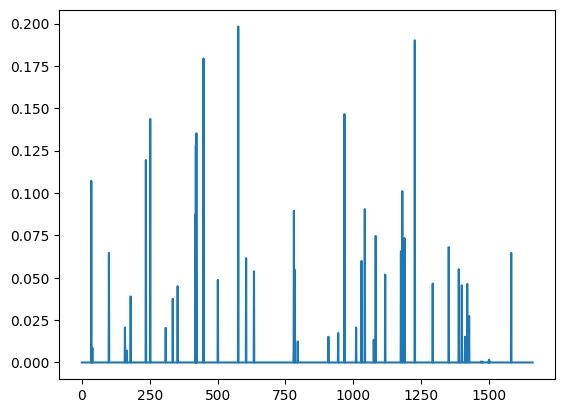

In [225]:
plt.plot(vecs[:, 0])

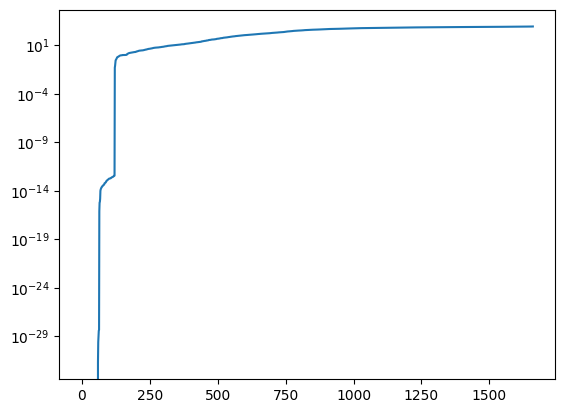

In [216]:
plt.plot(vals)
plt.yscale('log')

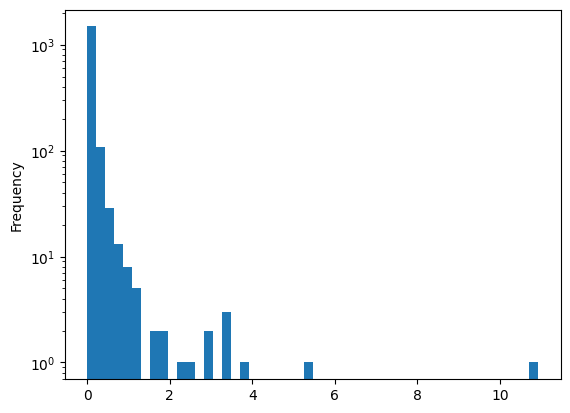

In [91]:
mse_rw = np.square(df_dt - df_dt.mean()).mean()
mse_rw.plot.hist(bins=50)
plt.yscale("log")

In [92]:
U_dt, s, V = np.linalg.svd(df_dt, full_matrices=False)

In [107]:
# U_dt = df_dt @ V.T / s.reshape((1, -1)) 
U = (df @ V.T / (s * s).reshape((1, -1))).values

In [233]:
r = 3

In [234]:
U_r = U[:, :r]
U_dt_r = U_dt[:, :r]

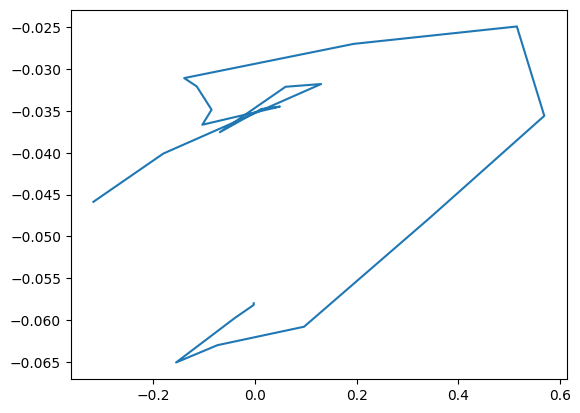

In [236]:
i = 2
plt.plot(U_dt_r[:, i], U_r[:, i])

In [268]:
ensemble_optimizer = ps.STLSQ()
model = ps.SINDy(optimizer=ensemble_optimizer)
model.fit(U_dt_r, t=df.index.values, ensemble=True, replace=False, quiet=True, n_candidates_to_drop=5)
model.print()

(x0)' = 0.000
(x1)' = 0.626 x0 + 0.043 x1 + 0.035 x2 + 3.658 x0^2 + 1.623 x0 x2 + -0.623 x1^2
(x2)' = 0.542 x0 + -0.422 x1 + -0.450 x2 + 2.637 x0^2 + -2.129 x0 x1 + -3.210 x0 x2 + 0.189 x1 x2 + -0.336 x2^2


In [269]:
ensemble_coefs = np.asarray(model.coef_list)
coefs = np.median(ensemble_coefs, axis=0)
coefs

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.2064123 , -0.06648737, -0.16528731,  0.34368792,
         0.        ,  0.3266752 , -0.29698344,  0.        ,  0.        ],
       [ 0.        , -0.11219279,  0.16634138,  0.11321885,  0.10977166,
        -0.13545611, -0.40757042,  0.        ,  0.44966775, -0.30671242]])

In [270]:
U_r_pred = model.simulate(U_r[0], df.index.values - 2001)

C:\Users\miche\anaconda3\envs\nc_2023_02\Lib\site-packages\pysindy\utils\axes.py:83: RuntimeWarning: overflow encountered in reduce
  results = super().__array_ufunc__(ufunc, method, *args, **kwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [239]:
df.index.values

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)